In [77]:
from fastapi import Request, FastAPI, Response
from typing import Any, Dict, AnyStr, List
from datetime import datetime
from bson import json_util
import numpy as np
import pandas as pd
import requests
import json
import heartpy as hp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from mlxtend.preprocessing import TransactionEncoder
from sklearn.model_selection import KFold

In [973]:
header={'Content-Type': 'application/json',
      'api-key': 'api-key_bb93997d9f18e0d4cf8117d4'}

In [121]:
url = 'http://127.0.0.1:8000/analyse/data_analyse'
doc =  requests.get(url, header=header)
doc = doc.json()

In [122]:
print(doc)

[{'_id': '65d4ee0ea2b81d5e92b2b163', 'identifier': 5893643, 'heartbeat': 78, 'X': 4, 'Y': 13, 'Z': 8, 'time': '21:37:58.933'}, {'_id': '65d4ee0ea2b81d5e92b2b164', 'identifier': 5893643, 'heartbeat': 88, 'X': 4, 'Y': 11, 'Z': 10, 'time': '21:38:02.986'}, {'_id': '65d4ee0ea2b81d5e92b2b165', 'identifier': 5893643, 'heartbeat': 99, 'X': -3, 'Y': 14, 'Z': 15, 'time': '21:39:02.986'}, {'_id': '65d4ee0ea2b81d5e92b2b166', 'identifier': 5893643, 'heartbeat': 45, 'X': 5, 'Y': 16, 'Z': 8, 'time': '21:39:07.007'}, {'_id': '65d4ee0ea2b81d5e92b2b167', 'identifier': 8673359, 'heartbeat': 62, 'X': -3, 'Y': 16, 'Z': 0, 'time': '21:39:11.025'}, {'_id': '65d4ee0ea2b81d5e92b2b168', 'identifier': 8673359, 'heartbeat': 100, 'X': 0, 'Y': 10, 'Z': 1, 'time': '21:40:15.069'}, {'_id': '65d4ee0ea2b81d5e92b2b169', 'identifier': 8673359, 'heartbeat': 105, 'X': 0, 'Y': 13, 'Z': 1, 'time': '21:41:19.114'}, {'_id': '65d4ee0ea2b81d5e92b2b16a', 'identifier': 8673359, 'heartbeat': 54, 'X': 3, 'Y': 14, 'Z': 1, 'time': '2

In [123]:
data_f = json_util.dumps(doc) 
data = pd.read_json(data_f)

/var/folders/jc/cf24y5qn29gbw1930dkhgdmm0000gn/T/ipykernel_6489/2462899896.py:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_json(data_f)


In [111]:
data.head(9)

,_id,identifier,heartbeat,X,Y,Z,time
0,65d4ee0ea2b81d5e92b2b163,5893643,78,4,13,8,21:37:58.933
1,65d4ee0ea2b81d5e92b2b164,5893643,88,4,11,10,21:38:02.986
2,65d4ee0ea2b81d5e92b2b165,5893643,99,-3,14,15,21:39:02.986
3,65d4ee0ea2b81d5e92b2b166,5893643,45,5,16,8,21:39:07.007
4,65d4ee0ea2b81d5e92b2b167,8673359,62,-3,16,0,21:39:11.025
5,65d4ee0ea2b81d5e92b2b168,8673359,100,0,10,1,21:40:15.069
6,65d4ee0ea2b81d5e92b2b169,8673359,105,0,13,1,21:41:19.114
7,65d4ee0ea2b81d5e92b2b16a,8673359,54,3,14,1,21:42:23.136
8,65d4ee0ea2b81d5e92b2b16b,8673359,89,0,9,2,21:42:31.211


In [730]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         25 non-null     object
 1   identifier  25 non-null     int64 
 2   heartbeat   25 non-null     int64 
 3   X           25 non-null     int64 
 4   Y           25 non-null     int64 
 5   Z           25 non-null     int64 
 6   time        25 non-null     object
dtypes: int64(5), object(2)
memory usage: 1.6+ KB


In [394]:
#Tratamento dos dados 

In [124]:
data.drop(["_id"], axis=1, inplace=True)

In [900]:
print(data)

    identifier  heartbeat   X   Y   Z   time
0      5893643         78   4  13   8  21:37
1      5893643         88   4  11  10  21:38
2      5893643         99  -3  14  15  21:39
3      5893643         45   5  16   8  21:39
4      8673359         62  -3  16   0  21:39
5      8673359        100   0  10   1  21:40
6      8673359        105   0  13   1  21:41
7      8673359         54   3  14   1  21:42
8      8673359         89   0   9   2  21:42
9      8673359         99  10   8   7  21:43
10     8673359         98  15  11  13  21:43
11     5550911        110   0  10   0  21:44
12     5550911         55  -1  -1   0  21:44
13     5550911        118   3  15   5  21:34
14     5550911         99  12   9   6  21:45
15     5550911         79  11  10  11  21:45
16     5550911         80  -1   9   8  21:45
17     5550911         81  -3  13   8  21:46
18     5550911         59  -3  11   8  21:36
19     5550911         61   3  10   9  21:47
20     5550911        144  -2   2  10  21:47
21     555

In [732]:
df = data.drop(["time"], axis=1, inplace=True)
r =data.corr()
print(r)

            identifier  heartbeat         X         Y         Z
identifier    1.000000  -0.171975  0.102003  0.226717 -0.334387
heartbeat    -0.171975   1.000000 -0.252092 -0.196158 -0.014570
X             0.102003  -0.252092  1.000000  0.264387  0.521437
Y             0.226717  -0.196158  0.264387  1.000000  0.523462
Z            -0.334387  -0.014570  0.521437  0.523462  1.000000


In [911]:
data.heartbeat(3, random_state=3).T

TypeError: 'Series' object is not callable

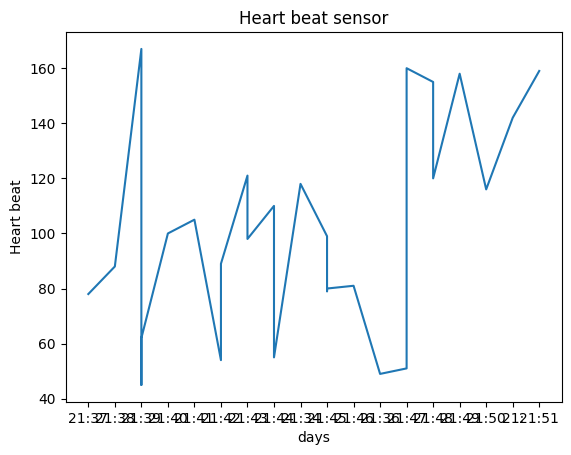

In [818]:
x =  data.time 
y = data.heartbeat
plt.title("Heart beat sensor")
plt.xlabel('days')
plt.ylabel('Heart beat')
plt.plot(x,y)
plt.show()

In [93]:
data_f = hp.get_data(data.heartbeat)
working_data, measures = hp.process(data_f, 100.0)
hp.plotter(working_data, measures)

AttributeError: 'Series' object has no attribute 'split'

In [98]:
hrdata = hp.get_data(data, column_name='heartbeat')
timerdata = hp.get_data(data, column_name='time')

working_data, measures = hp.process(hrdata, hp.get_samplerate_mstimer(timerdata))

#plot with different title
hp.plotter(working_data, measures, title='Heart Beat Detection on Noisy Signal')

AttributeError: 'DataFrame' object has no attribute 'split'

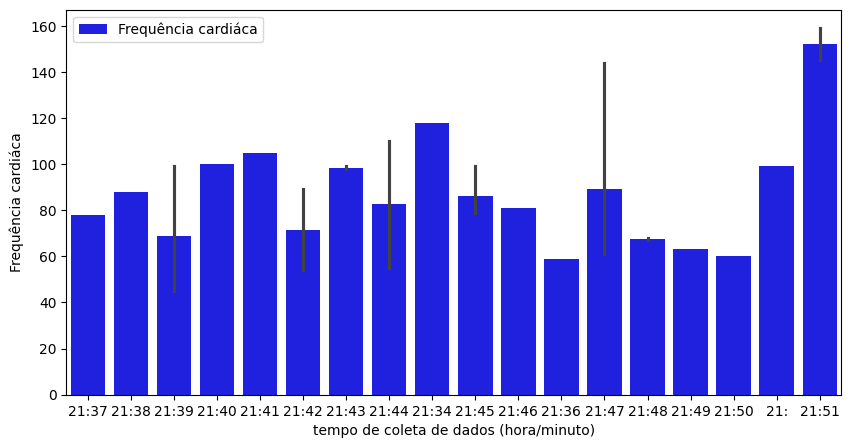

In [933]:
plt.figure(figsize=(10,5))
sns.barplot(x=data.time,
            y=data.heartbeat,              
            color="blue",                    
            label='Frequência cardiáca')                     

plt.ylabel('Frequência cardiáca')                     
plt.xlabel('tempo de coleta de dados (hora/minuto)')                   
plt.legend()                                 

plt.show()

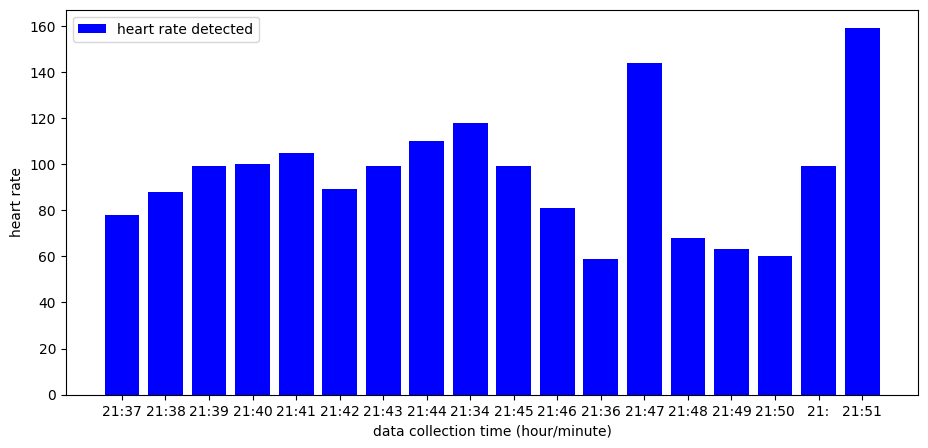

In [959]:
#x = data.heartbeat
#y = data.time 
#largura = 0.35
#x_label = ax.bar(x + largura/2, x, largura)
#ax = plt.subplots()

plt.figure(figsize=(11,5))
plt.bar(data.time, data.heartbeat, label='heartrate detected', color='blue')
plt.ylabel('heartrate')                     
plt.xlabel('data collection time (hour/minute)')                   
plt.legend()
plt.show()

/var/folders/jc/cf24y5qn29gbw1930dkhgdmm0000gn/T/ipykernel_6326/2137961597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data.heartbeat))


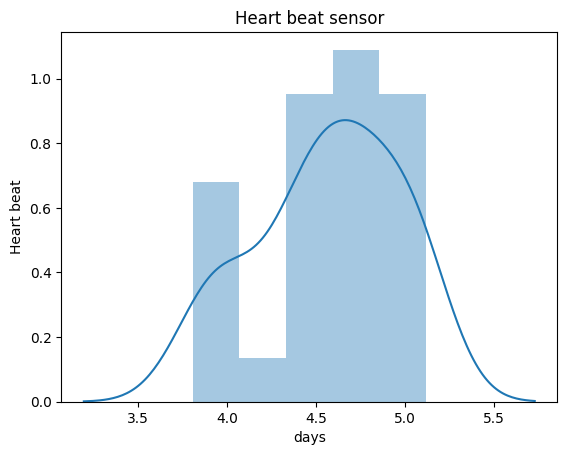

In [849]:
sns.distplot(np.log(data.heartbeat))
plt.title("Heart beat sensor")
plt.xlabel('days')
plt.ylabel('Heart beat')
plt.show()

/var/folders/jc/cf24y5qn29gbw1930dkhgdmm0000gn/T/ipykernel_6326/2137961597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data.heartbeat))


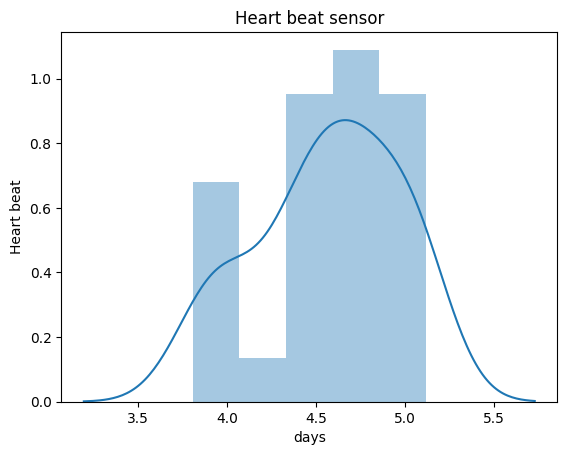

In [849]:
sns.distplot(np.log(data.heartbeat))
plt.title("Heart beat sensor")
plt.xlabel('days')
plt.ylabel('Heart beat')
plt.show()

In [850]:
data.isnull().sum()

identifier    0
heartbeat     0
X             0
Y             0
Z             0
time          0
dtype: int64

/var/folders/jc/cf24y5qn29gbw1930dkhgdmm0000gn/T/ipykernel_6489/4167277531.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.X, label=x,  hist=False, kde=True)
/var/folders/jc/cf24y5qn29gbw1930dkhgdmm0000gn/T/ipykernel_6489/4167277531.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


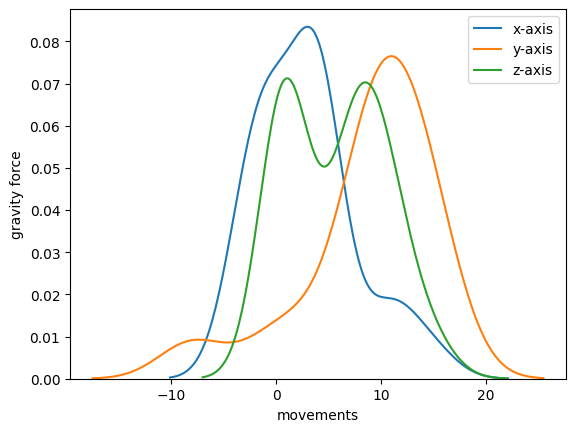

In [127]:
x = 'x-axis'
y = 'y-axis'
z = 'z-axis'

sns.distplot(data.X, label=x,  hist=False, kde=True)
sns.distplot(data.Y, label=y,  hist=False, kde=True)
sns.distplot(data.Z, label=z,  hist=False, kde=True)
plt.xlabel('movements')
plt.ylabel('gravity force')
plt.legend()

plt.show()

In [113]:
data.drop(["time"], axis=1, inplace=True)
data.drop(["heartbeat"], axis=1, inplace=True)

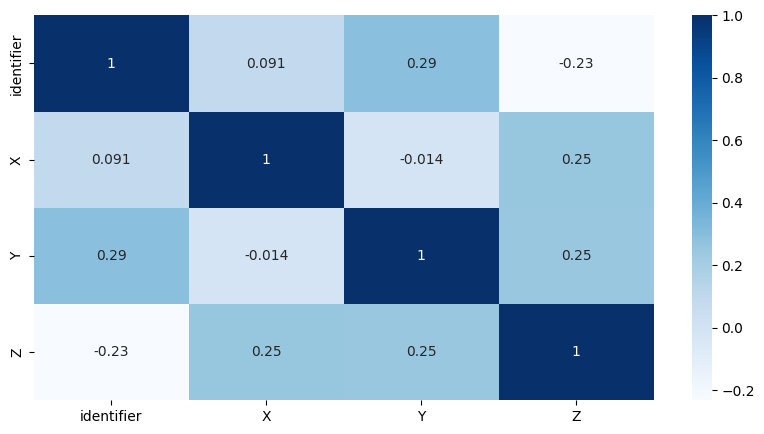

In [115]:
plt.figure(figsize=(10, 5))
corr = sns.heatmap (data.corr(), cmap = 'Blues', annot = True)
corr.set_title('Gráfico de Correlação', fontsize = 15)
plt.show()

/var/folders/jc/cf24y5qn29gbw1930dkhgdmm0000gn/T/ipykernel_6326/172464339.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.X, label = x,  kde =False)
/var/folders/jc/cf24y5qn29gbw1930dkhgdmm0000gn/T/ipykernel_6326/172464339.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Y, labe

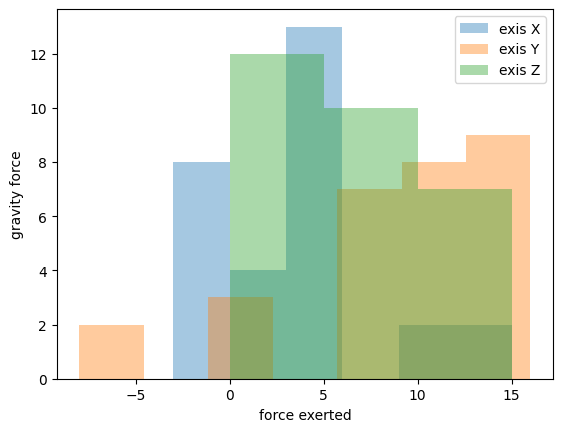

In [918]:
x = 'eixo X'
y = 'eixo Y'
z = 'eixo Z'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['Sex']=='female']
men = data[data['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Mulheres')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Homens')


In [852]:
data.shape

(28, 6)

In [853]:
occ = data['heartbeat'].value_counts()
occ

heartbeat
78     1
88     1
142    1
116    1
158    1
120    1
155    1
160    1
144    1
51     1
49     1
81     1
80     1
79     1
99     1
118    1
55     1
110    1
98     1
121    1
89     1
54     1
105    1
100    1
62     1
45     1
167    1
159    1
Name: count, dtype: int64

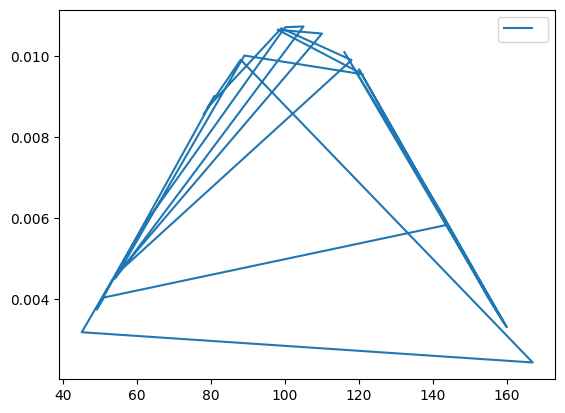

In [854]:
#Distribuição Normal do acerelorometro
pdf = norm.pdf(data.heartbeat, np.mean(data.heartbeat), np.std(data.heartbeat))
plt.plot(data.heartbeat, pdf)
plt.legend(('', ''))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/jc/cf24y5qn29gbw1930dkhgdmm0000gn/T/ipykernel_6326/1776676687.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data.X))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/

ValueError: cannot convert float NaN to integer

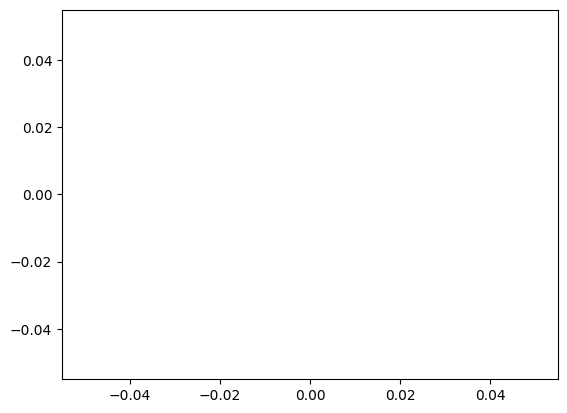

In [855]:
#Distribuição Normal do acerelorometro

sns.distplot(np.log(data.X))
sns.distplot(np.log(data.Y))
sns.distplot(np.log(data.Z))
plt.xlabel('Moviments')
plt.ylabel('')
ax.legend()
plt.show()

In [116]:
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [379]:
data.columns

Index(['identifier', 'heartbeat', 'X', 'Y', 'Z', 'date', 'time'], dtype='object')

In [829]:
#data.drop(["time", "date"], axis=1, inplace=True)
data.drop(["time"], axis=1, inplace=True)

In [830]:
data.head()

,identifier,heartbeat,X,Y,Z
0,5893643,78,0,19,11
1,5893643,88,0,19,10
2,5893643,167,-3,20,15
3,5893643,45,5,18,8
4,8673359,62,-3,16,0


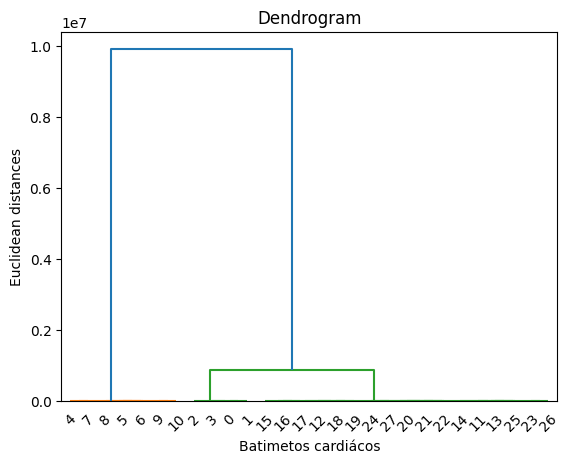

In [831]:
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Batimetos cardiácos')
plt.ylabel('Euclidean distances')
plt.show()

Text(0, 0.5, 'sepal length in cm')

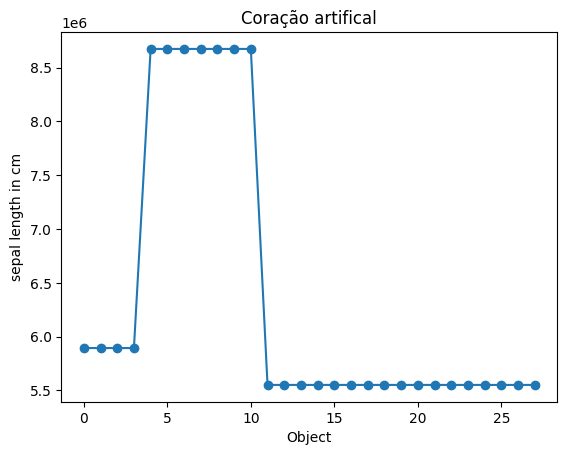

In [832]:
fig, ax = plt.subplots()
ax.plot(data.iloc[: ,0], marker="o")
ax.set_title("Coração artifical")
ax.set_xlabel("Object")
ax.set_ylabel("sepal length in cm")

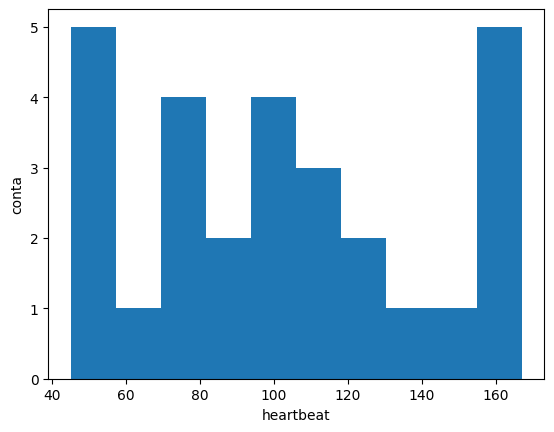

In [833]:
plt.hist(data.heartbeat)
plt.xlabel('heartbeat')
plt.ylabel('conta')
plt.show()

In [834]:
#Covariância e Correlação de Pearson
r = data.corr()
print(r)

            identifier  heartbeat         X         Y         Z
identifier    1.000000  -0.215967  0.076340  0.256932 -0.282156
heartbeat    -0.215967   1.000000  0.056604 -0.120595  0.032398
X             0.076340   0.056604  1.000000  0.220336  0.488502
Y             0.256932  -0.120595  0.220336  1.000000  0.564180
Z            -0.282156   0.032398  0.488502  0.564180  1.000000


/var/folders/jc/cf24y5qn29gbw1930dkhgdmm0000gn/T/ipykernel_6326/352767947.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.heartbeat[data['heartbeat']==167], color='orange', hist=False, kde=True, label='alto')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/var/folders/jc/cf24y5qn29gbw1930dkhgdmm0000gn/T/ipykernel_6326/352767947.py:4: UserWarning: 

`distplot` is a deprecated function and w

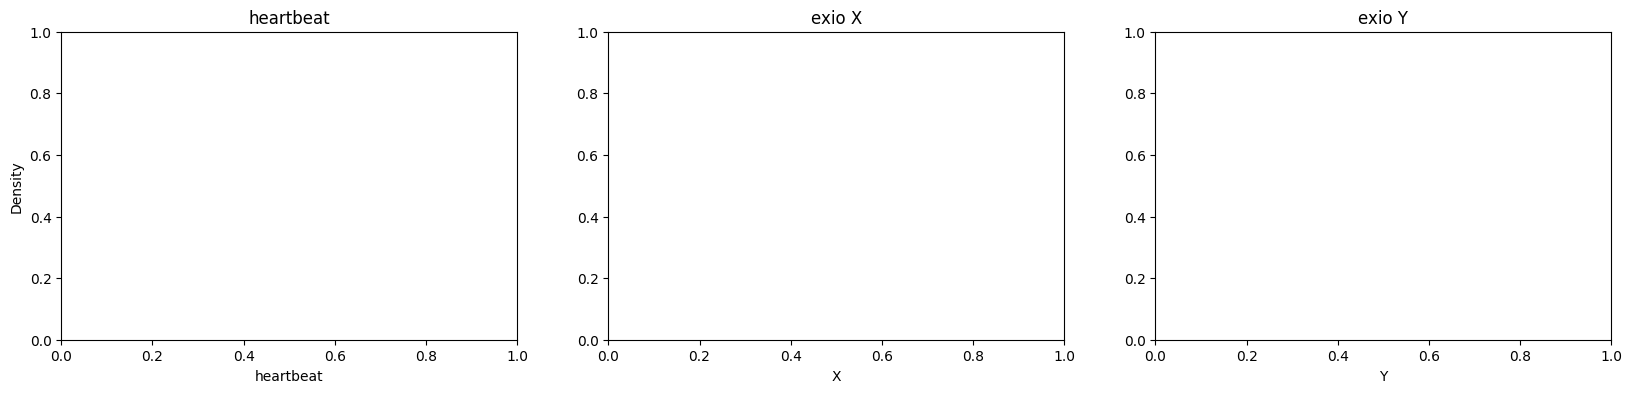

In [835]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.distplot(data.heartbeat[data['heartbeat']==167], color='orange', hist=False, kde=True, label='alto')
sns.distplot(data.heartbeat[data['heartbeat']==104], color='blue', hist=False, kde=True, label='baixo')
plt.title('heartbeat')

plt.subplot(1,3,2)
sns.distplot(data.X[data['X']==144], color='orange', hist=False, kde=True, label='alto')
sns.distplot(data.X[data['X']==16], color='blue', hist=False, kde=True, label='baixo')
plt.title('exio X')

plt.subplot(1,3,3)
sns.distplot(data.Y[data['Y']==82], color='orange', hist=False, kde=True, label='alto')
sns.distplot(data.Y[data['Y']==79], color='blue', hist=False, kde=True, label='baixo')
plt.title('exio Y')

#plt.subplot(1,3,3)
#sns.distplot(data.Z[data['Z']==567], color='orange', hist=False, kde=True, label='alto')
#sns.distplot(data.Z[data['Z']==70], color='blue', hist=False, kde=True, label='baixo')
#plt.title('exio Z')

plt.show()

#Aplicando Matrix de Correlação

In [31]:
plt.figure(figsize=(15, 10))
corr = sns.heatmap (data.corr(), cmap = 'Blues', annot = True)
corr.set_title('Gráfico de Correlação', fontsize = 15)
plt.show()

ValueError: could not convert string to float: '21:37'

<Figure size 1500x1000 with 0 Axes>

In [ ]:
#Treinar 

In [126]:
X = data.time
y = data['heartbeat']
target = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

lr = LinearRegression()
tr = lr.fit(X_train, y_train)

ValueError: could not convert string to float: '21:51:22.640 '

In [ ]:
#Arvor de decisão

In [837]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=3)

clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.36363636363636365

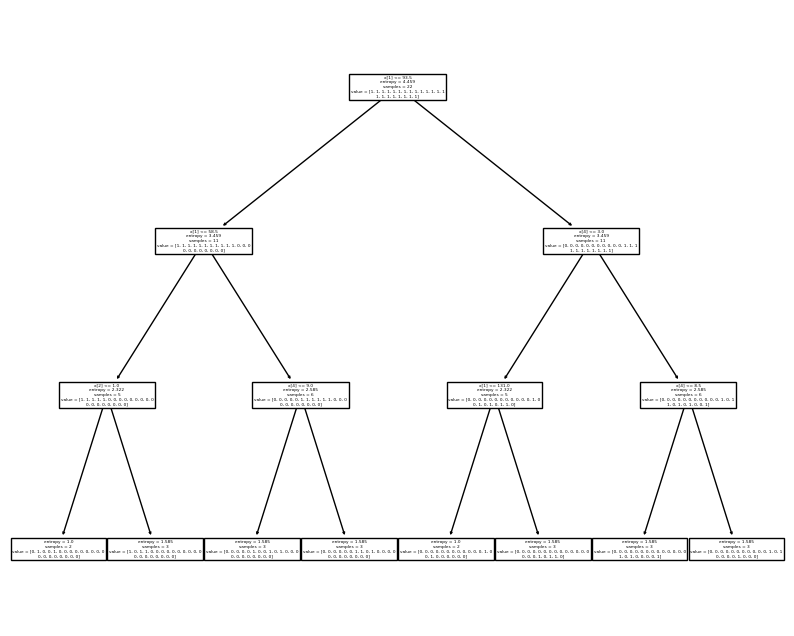

In [838]:
fig, ax = plt.subplots(figsize=(10,8))
tree.plot_tree(clf)
plt.show()